___

#### Rick Fontenot

Ensemeble (Meta-Learner) research project for Machine Learning II at Southern Methodist University
Video Presentation of research and results from code demonstration below can be viewed at:
https://www.youtube.com/watch?v=vC2ytNhvDnA

Background information on the dataset:
* Anonymized data set with 45 numeric features and 5 string features
* Target is binary and also anonymized, client wants predictions to decide what actions to take on each transaction
* Incorrect predictions cost the client money on each transaction, $100 for a false positive and $200 for a false negative
* Cost function was set up to sum all these costs on prediction set then divide by total predictions to normalize to Average Money Lost per transaction
* The client has approximately 160,000 transactions annually, so the annual value of savings can be estimated for each model
* Goal is to minimize money loss (not maximize accuracy)
___


In [72]:
# Base Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)


Initialize all seed values so neural networks run later in the notebook are reproducible for the purposes of this demonstration

In [417]:
seed_value= 42
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
from keras.wrappers.scikit_learn import KerasClassifier

print(tf.__version__)
 

KeyboardInterrupt: 

### Load the raw data


In [74]:
anonymized=pd.read_csv("/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/QTW/Case Study 7/final_project(5).csv")

anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


### 160,000 records, 50 features plus target "y"

In [75]:
anonymized.shape

(160000, 51)

In [76]:
print(anonymized.groupby('y').size())

y
0    95803
1    64197
dtype: int64


### All features have at least 1 missing value, but highest feature missing is 41 or 0.026%
### Since we have no information about features and it's a low percentage, drop missing values instead of imputing

In [77]:
missing = pd.DataFrame(anonymized.isna().sum())
missing.head()

,0
x0,26
x1,25
x2,38
x3,37
x4,26


In [78]:
anonymized = anonymized.dropna()
anonymized.isna().sum()


x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [79]:
anonymized.shape

(158392, 51)

After removing rows with missing values, there are 158,392 records (1,608 records dropped)

### There are no duplicate rows

In [80]:
# Check for duplicate rows
print('Duplicate rows: ',anonymized.duplicated(keep='first').sum())

Duplicate rows:  0


### Data Types and processing needed

The target is int64, and all features are floats except:

x24 : appears to be strings with names of continents or reagions of globe, not ordinal, so needs 1-hot encoding

x29 : Month, not clear if all in same year or not, may need eda to check ordinal vs. 1-hot

x30 : Day of the week, may need eda to check ordinal vs. 1-hot or biining based on weekdays etc.

x32 : Includes a % sign at end, needs to be dropped, maybe multiply by 100 before scaling with other variables

x37 : Starts with a $ which needs to be removed, not that some are negative and that needs to be preserved


In [81]:
anonymized.dtypes

x0     float64
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
x23    float64
x24     object
x25    float64
x26    float64
x27    float64
x28    float64
x29     object
x30     object
x31    float64
x32     object
x33    float64
x34    float64
x35    float64
x36    float64
x37     object
x38    float64
x39    float64
x40    float64
x41    float64
x42    float64
x43    float64
x44    float64
x45    float64
x46    float64
x47    float64
x48    float64
x49    float64
y        int64
dtype: object

x24 : appears to be strings with names of continents or reagions of globe, not ordinal, so needs 1-hot encoding

In [82]:
anonymized.x24.unique()

array(['euorpe', 'asia', 'america'], dtype=object)

x24 has 3 unique values 'euorpe', 'asia', 'america'
These are not ordinal, so one-hot encode them

In [83]:
# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(anonymized.x24,drop_first=True)

#concating dummies to the data frame
anonymized = pd.concat([anonymized,dummies],axis=1)

#dropping original columns
anonymized = anonymized.drop('x24',axis=1)

anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0


x29 : Month, not clear if all in same year or not, may need eda to check ordinal vs. 1-hot


In [84]:
print(anonymized.groupby('x29').size())

x29
Apr         6699
Aug        29115
Dev           23
Feb          139
January        9
July       45122
Jun        40900
Mar         1221
May        21708
Nov          331
Oct         2385
sept.      10740
dtype: int64


In [85]:
anonymized['month'] = np.where(
    anonymized['x29'] == 'Apr', 4, np.where(
        anonymized['x29'] == 'Aug', 8, np.where(
            anonymized['x29'] == 'Dev', 12, np.where(
                anonymized['x29'] == 'Feb', 2, np.where(
                    anonymized['x29'] == 'January', 1, np.where(
                        anonymized['x29'] == 'July', 7, np.where(
                            anonymized['x29'] == 'Jun', 6, np.where(
                                anonymized['x29'] == 'Mar', 3, np.where(
                                    anonymized['x29'] == 'May', 5, np.where(
                                        anonymized['x29'] == 'Nov', 11, np.where(
                                            anonymized['x29'] == 'Oct', 10, np.where(
                                                anonymized['x29'] == 'sept.', 9, -1))))))))))))

anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7


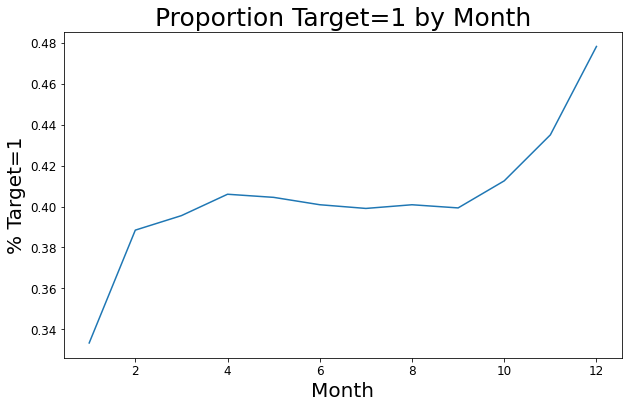

In [86]:
df1 = anonymized.groupby('month')['y'].mean().reset_index(name='Avg_Y')

plt.figure(figsize = (10,6))
fig = sns.lineplot(data=df1, x="month", y="Avg_Y")
fig.set_xlabel("Month",fontsize=20)
fig.set_ylabel(ylabel="% Target=1",fontsize=20)
fig.axes.set_title("Proportion Target=1 by Month",fontsize=25)
fig.tick_params(labelsize=12)




Proportion of Y=1 does have increasing rate through the year, keep month as ordinal rather than categorical encoding.

Drop original feature x29

In [87]:
anonymized = anonymized.drop('x29',axis=1)
anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7


x30 : Day of the week, may need eda to check ordinal vs. 1-hot or biining based on weekdays etc.

In [88]:
print(anonymized.groupby('x30').size())

x30
friday          556
monday          484
thurday       29164
tuesday       27690
wednesday    100498
dtype: int64


In [89]:
anonymized['weekday'] = np.where(
    anonymized['x30'] == 'friday', 5, np.where(
        anonymized['x30'] == 'monday', 1, np.where(
            anonymized['x30'] == 'thurday', 3, np.where(
                anonymized['x30'] == 'tuesday', 2, np.where(
                    anonymized['x30'] == 'wednesday', 3, -1)))))


anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month,weekday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7,2
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8,3
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7,3
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7,3
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7,2


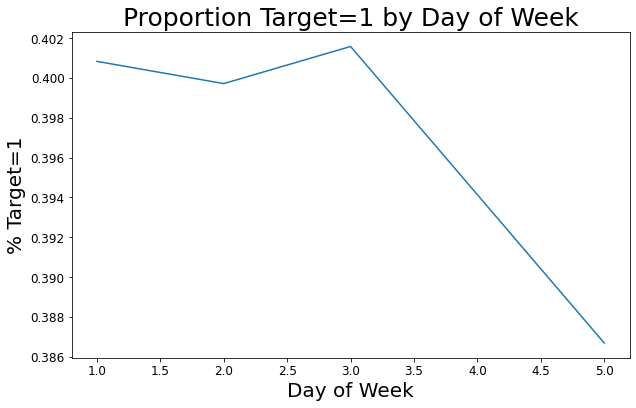

In [90]:
df2 = anonymized.groupby('weekday')['y'].mean().reset_index(name='Avg_Y')

plt.figure(figsize = (10,6))
fig = sns.lineplot(data=df2, x="weekday", y="Avg_Y")
fig.set_xlabel("Day of Week",fontsize=20)
fig.set_ylabel(ylabel="% Target=1",fontsize=20)
fig.axes.set_title("Proportion Target=1 by Day of Week",fontsize=25)
fig.tick_params(labelsize=12)


Proportion of Y=1 does have decreasing rate through the week, keep weekday as ordinal rather than categorical encoding.

Drop original feature x30

In [91]:
anonymized = anonymized.drop('x30',axis=1)
anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month,weekday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7,2
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8,3
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7,3
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7,3
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7,2


x32: remove % and convert to float then multiply by 100 before any future scaling

In [92]:
print(anonymized.x32[0:2])
anonymized.x32 = anonymized.x32.replace('[\%,]', '', regex=True).astype(float)
anonymized.x32 = anonymized.x32 * 100
print(anonymized.x32[0:2])

0      0.0%
1    -0.02%
Name: x32, dtype: object
0    0.0
1   -2.0
Name: x32, dtype: float64


x37: remove $ and convert to float

In [93]:
print(anonymized.x37[0:2])
anonymized.x37 = anonymized.x37.replace('[\$,]', '', regex=True).astype(float)
print(anonymized.x37[0:2])


0    $1313.96
1    $1962.78
Name: x37, dtype: object
0    1313.96
1    1962.78
Name: x37, dtype: float64


In [94]:
anonymized.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month,weekday
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,0.000816,0.030692,-1.337022,0.005699,0.008887,0.002436,0.006746,0.012607,0.014051,0.021573,0.298973,-0.027341,0.007413,0.726195,-0.001621,-0.001013,-0.003656,0.030159,-0.007546,-0.000953,-0.007019,-0.001261,0.000049,0.006182,0.502723,6.063752,0.003466,-2.318750,6.706030,-1.832959,-0.002174,-0.007254,0.000996,-12.751993,0.028262,0.000160,-0.672052,0.401195,0.868705,0.103402,6.678917,2.826090
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,7.870963,8.767797,14.752763,8.952626,6.964429,3.271402,4.982869,7.570453,4.540760,7.594895,5.803957,9.410971,5.412217,14.908566,1.263860,0.843154,6.773700,14.437525,2.767239,1.039742,1.747829,8.012550,2.379169,1.592854,999.670281,16.886960,5.134009,17.040216,18.675642,5.110079,1.535282,4.163766,0.396604,36.608634,4.787974,1.935087,15.033134,0.490142,0.337723,0.304484,1.363430,0.413328
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,-6.364653,-3.857484,-32.003555,-72.896705,-12.289364,-5.000000,-7.451454,-36.116606,-10.008149,-6.866024,-4734.540000,-74.297559,-22.101647,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000,0.000000,0.000000,1.000000,1.000000
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,-5.286455,-5.902750,-11.383333,-6.030792,-4.695374,-2.207028,-3.343254,-5.070818,-3.054185,-5.105826,-3.605254,-6.360632,-3.649892,-9.260850,-0.853516,-0.566752,-4.596859,-9.700474,-1.875986,-1.000000,-1.184854,-5.403326,-1.610630,-1.068702,-690.690000,-5.246467,-3.458830,-13.952620,-5.802178,-5.159340,-1.039992,-2.814168,-0.266369,-36.432779,-3.216974,-1.320800,-10.929046,0.000000,1.000000,0.000000,6.000000,3.000000
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,-0.019074,0.013579,-1.627464,-0.004343,0.003644,0.005473,0.012754,0.024699,0.017192,0.040295,0.432127,-0.016830,0.009153,1.035878,-0.004934,-0.001314,0.035506,0.244454,-0.000218,0.000000,-0.006598,-0.015421,-0.003761,0.004384,-13.320000,6.192058,0.017274,-2.709284,6.847926,-1.922935,-0.004279,-0.012278,0.001841,-12.975088,0.036234,-0.011800,-0.569139,0.000000,1.000000,0.000000,7.000000,3.000000
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,5.327598,5.933786,8.375380,6.039018,4.702776,2.212473,3.366107,5.102171,3.073832,5.158919,4.303770,6.318381,3.672444,11.031540,0.850890,0.567379,4.647103,9.934612,1.854836,1.000000,1.179054,5.411490,1.602599,1.079242,664.050000,17.424261,3.462758,8.972837,19.269855,1.452018,1.033870,2.781096,0.269194,11.445524,3.269134,1.318161,9.649839,1.000000,1.000000,0.000000,8.000000,3.000000
max,1.6008

Most features have mean centered at 0 or 1 but also have wide ranges with standard deviation > 1.

Scale/Standardize features prior to modeling

Categorical variables to exclude from scaling:
y, asia, europe

In [95]:
anonymized.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y,asia,euorpe,month,weekday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,-0.801340,1.142950,1.005131,-18.473784,-3.851669,0.0,-1.940031,-5.492063,0.627121,-0.873824,1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,0,1,7,2
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,0.818792,-0.642987,0.751086,3.749377,1.391594,-2.0,2.211462,-4.460591,1.035461,0.228270,1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,1,0,8,3
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,-0.718315,-0.566757,4.171088,11.522448,-3.262082,-1.0,0.419607,-3.804056,-0.763357,-1.612561,430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,1,0,7,3
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,-0.052430,-0.558582,9.215569,30.595226,-2.285241,1.0,-3.442715,4.420160,1.164532,3.033455,-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0,1,0,7,3
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,-0.223449,0.350781,1.811182,-4.094084,0.921047,1.0,-0.431640,12.165494,-0.167726,-0.341604,-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1,1,0,7,2


In [96]:
#fix error on spelling in europe column
anonymized.rename(columns = {'euorpe':'europe'}, inplace = True)


In [97]:
scaling_exclusions = ['y', 'asia','europe']

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(anonymized.drop(scaling_exclusions, axis=1))
anonymized_scaled = scl_obj.transform(anonymized.drop(scaling_exclusions, axis=1))

anonymized_scaled = pd.DataFrame(anonymized_scaled, index=anonymized.drop(scaling_exclusions, axis=1).index, columns=anonymized.drop(scaling_exclusions, axis=1).columns)


anonymized_scaled.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,month,weekday
count,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05,1.583920e+05
mean,-1.668783e-17,1.749531e-18,-6.370086e-18,6.056068e-18,6.358871e-18,1.417568e-17,3.633641e-18,1.419811e-17,1.069905e-17,1.647475e-17,8.792513e-18,-2.063549e-18,-2.319250e-17,-2.408969e-17,-2.799249e-17,2.198128e-17,7.222422e-18,-1.534204e-17,3.140183e-19,-3.454202e-18,4.441116e-18,-1.256073e-17,-2.691586e-17,-2.435885e-17,-1.188784e-18,-1.096821e-17,8.433635e-18,-3.813080e-19,-2.108409e-18,-1.215700e-17,-9.061672e-18,-1.812334e-17,8.433635e-18,2.557006e-18,1.166354e-18,6.637002e-17,-8.971952e-20,1.729344e-17,1.520185e-16,5.006349e-17,1.839250e-18,-1.682241e-17,1.451213e-17,-6.684104e-17,5.854199e-18,1.561120e-17,2.041119e-17,1.984147e-16,-2.772109e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-4.289917e+00,-4.145246e+00,-4.387726e+00,-4.195302e+00,-4.459657e+00,-4.410314e+00,-4.387726e+00,-5.690922e+00,-4.229797e+00,-4.404074e+00,-4.612841e+00,-4.348148e+00,-4.260974e+00,-4.326031e+00,-4.438871e+00,-5.198030e+00,-5.227874e+00,-4.545119e+00,-4.451414e+00,-4.694612e+00,-4.647942e+00,-4.619571e+00,-4.370054e+00,-4.518660e+00,-5.034619e+00,-4.573877e+00,-4.724154e+00,-5.051219e+00,-4.438307e+00,-4.807982e+00,-4.259261e+00,-4.507361e+00,-4.206607e+00,-4.314411e+00,-4.736619e+00,-4.758794e+00,-4.305638e+00,-4.210080e+00,-4.758794e+00,-5.107724e+00,-4.477407e+00,-4.317315e+00,-4.423114e+00,-5.164777e+00,-4.409937e+00,-4.387575e+00,-4.331721e+00,-4.165182e+00,-4.418035e+00
25%,-6.749239e-01,-6.723241e-01,-6.793598e-01,-6.731502e-01,-6.757837e-01,-6.733119e-01,-6.793598e-01,-6.423397e-01,-6.744416e-01,-6.711357e-01,-6.717459e-01,-6.767334e-01,-6.809804e-01,-6.742726e-01,-6.754719e-01,-6.753898e-01,-6.723058e-01,-6.714843e-01,-6.757121e-01,-6.751133e-01,-6.726857e-01,-6.729710e-01,-6.757520e-01,-6.698885e-01,-6.740442e-01,-6.709818e-01,-6.780958e-01,-6.739842e-01,-6.752021e-01,-9.608628e-01,-6.738871e-01,-6.742027e-01,-6.769944e-01,-6.748189e-01,-6.914229e-01,-6.697626e-01,-6.743866e-01,-6.827324e-01,-6.697626e-01,-6.509472e-01,-6.759807e-01,-6.741307e-01,-6.741383e-01,-6.468654e-01,-6.777910e-01,-6.826378e-01,-6.822946e-01,-4.979492e-01,4.207579e-01
50%,-2.724042e-03,9.964953e-04,-1.460565e-02,-6.766200e-04,-1.364766e-04,2.414812e-04,-1.460565e-02,2.418360e-02,1.424076e-03,-1.923449e-04,-2.526970e-03,-1.951858e-03,-1.968737e-02,-1.121654e-03,-7.528869e-04,9.283455e-04,1.205676e-03,1.597362e-03,6.916687e-04,2.465170e-03,2.294191e-02,1.116942e-03,3.214291e-04,2.077225e-02,-2.621017e-03,-3.575499e-04,5.781520e-03,1.484296e-02,2.648298e-03,9.168944e-04,2.406200e-04,-1.767285e-03,-1.601536e-03,-1.128821e-03,-1.382733e-02,7.59

In [98]:
anonymized.shape

(158392, 52)

In [99]:
anonymized_scaled.shape

(158392, 49)

All features centered with mean=0 and standard deviation=1
Merge categorical features back to dataframe 

In [100]:
anonymized_scaled = pd.concat([anonymized_scaled,anonymized[scaling_exclusions]],axis=1)
anonymized_scaled.head()


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,month,weekday,y,asia,europe
0,-0.446704,-0.625413,0.434618,0.310530,-0.281966,0.103154,0.434618,-0.232213,-0.113636,-0.662424,0.786012,1.507890,1.830336,-0.561062,1.506923,-0.770349,0.423686,0.773182,-1.471170,0.233042,-0.380446,-0.181767,-0.466377,0.189611,-0.632761,1.356770,0.148927,-1.281660,-1.389159,0.000917,-1.105954,-0.685277,0.263568,-0.552473,1.313895,-0.439245,-1.010834,-0.486700,-0.439245,1.418187,-1.513395,0.403982,-0.669003,2.008642,-1.611952,0.078255,-0.490127,0.235497,-1.998638,0,0,1
1,-0.401783,-0.092958,2.183716,0.517609,1.006859,-0.318066,2.183716,0.031831,0.103916,0.051279,-1.487710,-0.271848,-1.604987,1.093974,-1.575094,0.458998,-0.482571,-1.230372,-0.443421,0.661458,-1.052554,1.152027,-0.089709,0.661662,0.649135,-0.761398,0.111423,0.257609,0.505610,-1.922643,1.269282,-0.556545,0.435200,0.139428,1.962931,1.584248,-1.003795,0.262097,1.584248,1.237534,0.498109,1.569237,2.538893,0.780083,-1.028610,-0.165596,1.156917,0.968944,0.420758,0,1,0
2,-0.864812,-0.226098,1.009430,0.819414,-0.830980,-1.476050,1.009430,0.614196,0.601384,-0.415040,0.199701,-0.479194,0.909366,-0.576838,1.047310,-0.670928,-0.817238,-1.015486,0.886986,-0.876276,0.241448,-0.254159,0.454549,-0.402240,-0.567070,-0.670987,0.616319,0.796004,-1.176098,-0.960863,0.244090,-0.474606,-0.320872,-1.016256,0.430110,-0.378811,1.699480,0.085422,-0.378811,2.137317,-0.447940,-0.654185,1.899140,1.191209,-1.557414,-1.080556,-0.478769,0.235497,0.420758,0,1,0
3,-0.659692,0.800119,-1.732719,0.453762,1.019236,0.296783,-1.732719,-0.367229,-0.034612,-0.876943,-0.254235,-2.203224,0.835938,-0.661269,0.359329,0.394305,-0.502449,-2.078556,-0.605503,0.144303,0.279930,-1.503763,0.270354,-0.819037,-0.040201,-0.661293,1.361037,2.117064,-0.823095,0.962697,-1.965700,0.551814,0.489451,1.900539,-2.367581,0.481137,-1.244358,0.845248,0.481137,-1.102690,1.916894,-1.541123,1.055918,-1.630019,1.113859,0.933248,-0.465559,0.235497,0.420758,0,1,0
4,-0.734536,0.047730,-0.768702,0.210717,0.458809,-0.082130,-0.768702,1.153519,0.137979,-0.678816,0.847004,0.220720,-1.814535,-0.141261,0.825778,0.143715,-0.232165,-1.866647,0.994091,-0.171951,-1.606718,-0.745141,-0.366979,-1.121799,-0.175517,0.417237,0.267925,-0.285662,0.335568,0.962697,-0.242943,1.518467,-0.070518,-0.218342,-0.621370,-1.103972,0.220166,1.896900,-1.103972,-0.664762,1.163375,0.952279,-0.247060,-0.036424,-0.049418,-0.462565,1.090714,0.235497,-1.998638,1,1,0


array([[<AxesSubplot:title={'center':'x0'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>],
       [<AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>],
       [<AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>,
        <AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21

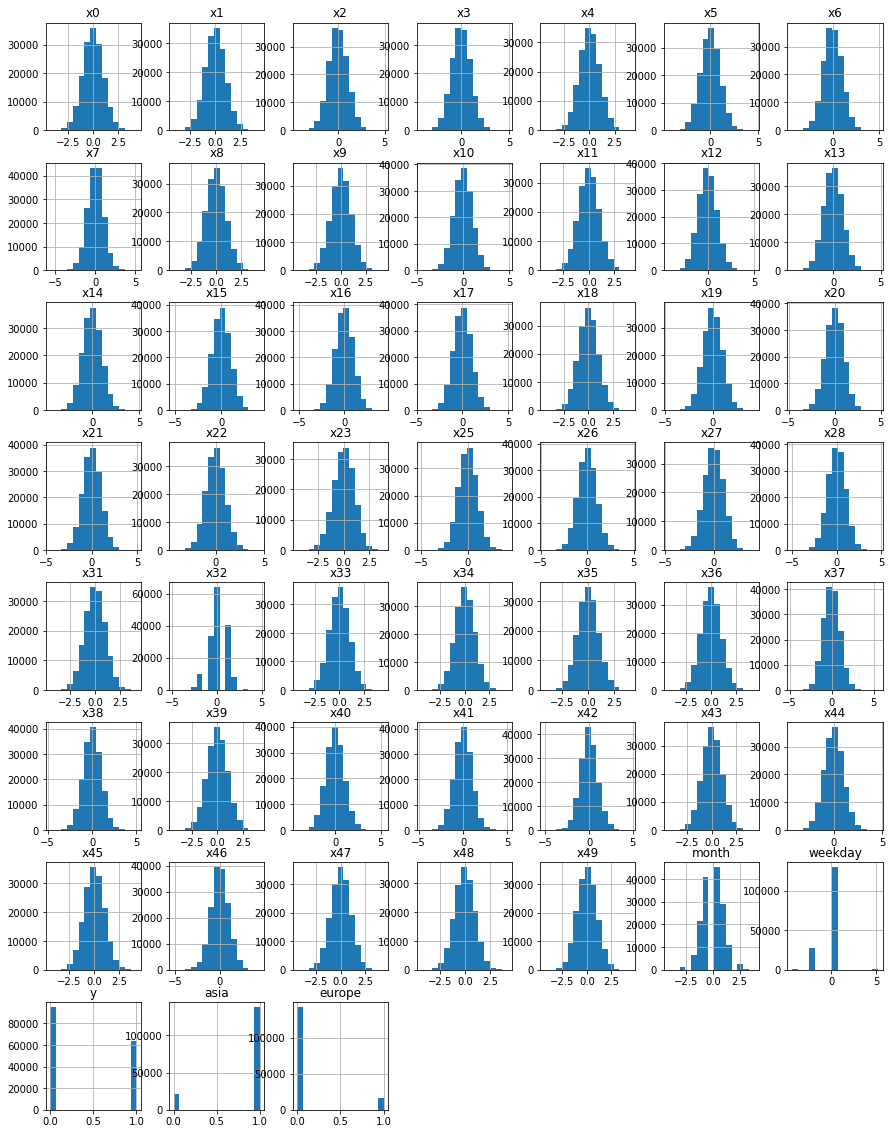

In [101]:
anonymized_scaled.hist(bins=15, figsize=(15,20))


## Split into 80% Training, 10% Validation, 10% test sets

In [102]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, holdback_index in split.split(anonymized_scaled, anonymized_scaled.y):
    training_df = anonymized_scaled.iloc[train_index]
    holdback_df = anonymized_scaled.iloc[holdback_index]

In [103]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for validation_index, test_index in split.split(holdback_df, holdback_df.y):
    validation_df = holdback_df.iloc[validation_index]
    test_df = holdback_df.iloc[test_index]

print("Size of training set: ",training_df.shape)
print("Size of validation set: ",validation_df.shape)
print("Size of test set: ",test_df.shape)

Size of training set:  (126713, 52)
Size of validation set:  (15839, 52)
Size of test set:  (15840, 52)


In [104]:
train_features = training_df.drop(['y'],axis=1).values #droping target
train_labels = training_df['y'].values

validation_features = validation_df.drop(['y'],axis=1).values #droping target
validation_labels = validation_df['y'].values

test_features = test_df.drop(['y'],axis=1).values #droping target
test_labels = test_df['y'].values

Setup a cross validation strategy

In [105]:
from sklearn.model_selection import StratifiedKFold

num_cv_iterations = 5
cv_object = StratifiedKFold(n_splits=num_cv_iterations, shuffle=True, random_state=27)

## Define custom scoring metric for costs of incorrect predictions

In [106]:
from sklearn.metrics import confusion_matrix

incorrect_0 = 100
incorrect_1 = 250

def calculate_cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    weight = np.array([[0, incorrect_0], [incorrect_1, 0]])
    out = cm * weight
    return out.sum()/cm.sum() #Returns Cost/Observation, not total cost 


In [107]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


scorer = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'cost': make_scorer(calculate_cost, greater_is_better=False)
}

### Note that this is treated as loss in the scorer so costs will be shown as negative values

* when using calculate_cost() function on validation or test predictions the value will be shown as positive value

### Logistic Regression Model with prediction probabilities for all splits

Note that all possible interaction terms between features have been added just for the logistic regression as part of insights from tuning in a previous notebook. This gives about a 17% increase in accuracy. Further tuning and optimization could be done, but this is good enough for the demo on ensembling.

In [108]:
from sklearn.preprocessing import PolynomialFeatures

print("Train Feature Shape: ", train_features.shape)
train_features_interactions = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(train_features)
print("Train Feature Shape w Interactions: ", train_features_interactions.shape)

validation_features_interactions = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(validation_features)
test_features_interactions = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(test_features)


Train Feature Shape:  (126713, 51)
Train Feature Shape w Interactions:  (126713, 1326)


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime
from sklearn.model_selection import cross_val_predict

t = datetime.now()
lr_tuned = LogisticRegression(penalty='l2')

lr_tuned_model = lr_tuned.fit(train_features_interactions,train_labels)
lr_train_time = (datetime.now() - t)

t = datetime.now()
lr_tuned_val_probs = lr_tuned_model.predict_proba(validation_features_interactions)[:,1]
lr_val_predict_time = (datetime.now() - t)

t = datetime.now()
lr_tuned_oof_probs = cross_val_predict(lr_tuned_model, train_features_interactions, train_labels, cv=5, method='predict_proba')[:,1]
lr_oof_predict_time = (datetime.now() - t)

print("Training Time: ", lr_train_time)
print("Validation Prediction Time: ", lr_val_predict_time)
print("Training O.O.F. Prediction Time: ", lr_oof_predict_time)

lr_tuned_train_probs = lr_tuned_model.predict_proba(train_features_interactions)[:,1]


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Training Time:  0:00:11.023973
Validation Prediction Time:  0:00:00.008569
Training O.O.F. Prediction Time:  0:00:55.386740


In [110]:
lr_tuned_test_probs = lr_tuned_model.predict_proba(test_features_interactions)[:,1]
lr_tuned_test_predictions = [int(p>=0.5) for p in lr_tuned_test_probs]

lr_test_accuracy = accuracy_score(test_labels, lr_tuned_test_predictions)
lr_test_cost = calculate_cost(test_labels, lr_tuned_test_predictions)

print("Validation Set Accuracy: ", lr_test_accuracy)
print("Validation Set Cost: ", lr_test_cost)

Validation Set Accuracy:  0.8728535353535354
Validation Set Cost:  22.88510101010101


In [111]:
import pandas as pd

def minutes(td):
    return round((td.seconds/60),1)

summary = pd.DataFrame(columns = ["Model","Training Time","Val Predict Time", "Train OOF Predict Time", "Test Accuracy", "Test Cost"])
summary.loc[len(summary.index)] = ["Logistic Regression", minutes(lr_train_time), minutes(lr_val_predict_time), minutes(lr_oof_predict_time), lr_test_accuracy, lr_test_cost]

summary

,Model,Training Time,Val Predict Time,Train OOF Predict Time,Test Accuracy,Test Cost
0,Logistic Regression,0.2,0.0,0.9,0.872854,22.885101


### Random Forest Model with prediction probabilities for all splits

From previous notebook, a grid search was performed to tune the RF model and best parameters are included below

In [112]:
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.model_selection import cross_val_predict


t = datetime.now()
rf_tuned = RandomForestClassifier(min_samples_split = 8, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 30, criterion = 'entropy')
rf_tuned_model = rf_tuned.fit(train_features,train_labels)
rf_train_time = (datetime.now() - t)

t = datetime.now()
rf_tuned_val_probs = rf_tuned_model.predict_proba(validation_features)[:,1]
rf_val_predict_time = (datetime.now() - t)

t = datetime.now()
rf_tuned_oof_probs = cross_val_predict(rf_tuned_model, train_features, train_labels, cv=5, method='predict_proba')[:,1]
rf_oof_predict_time = (datetime.now() - t)

print("Training Time: ", rf_train_time)
print("Validation Prediction Time: ", rf_val_predict_time)
print("Training O.O.F. Prediction Time: ", rf_oof_predict_time)

rf_tuned_train_probs = rf_tuned_model.predict_proba(train_features)[:,1]


Training Time:  0:01:16.783968
Validation Prediction Time:  0:00:00.304612
Training O.O.F. Prediction Time:  0:04:51.943018


From previous notebook, using validation predictions the optimal probability cutoff that minimzed cost was 0.37
Use this cutoff to assess metrics on test set

In [113]:
rf_tuned_test_probs = rf_tuned_model.predict_proba(test_features)[:,1]
rf_tuned_test_predictions = [int(p>=0.37) for p in rf_tuned_test_probs]

rf_test_accuracy = accuracy_score(test_labels, rf_tuned_test_predictions)
rf_test_cost = calculate_cost(test_labels, rf_tuned_test_predictions)

print("Validation Set Accuracy: ", rf_test_accuracy)
print("Validation Set Cost: ", rf_test_cost)

Validation Set Accuracy:  0.9167929292929293
Validation Set Cost:  11.360479797979798


In [114]:

summary.loc[len(summary.index)] = ["Random Forest", minutes(rf_train_time), minutes(rf_val_predict_time), minutes(rf_oof_predict_time), rf_test_accuracy, rf_test_cost]

summary

,Model,Training Time,Val Predict Time,Train OOF Predict Time,Test Accuracy,Test Cost
0,Logistic Regression,0.2,0.0,0.9,0.872854,22.885101
1,Random Forest,1.3,0.0,4.8,0.916793,11.360480


### XGBoost Model with prediction probabilities for all splits

From previous notebook, a grid search was performed to tune the XGB model and best parameters are included below

In [115]:
import xgboost as xgb
from xgboost import XGBClassifier

t = datetime.now()
XGBC_tuned = XGBClassifier(use_label_encoder=False, subsample = 0.6, reg_lambda = 12.8, reg_alpha = 3.2, n_estimators = 150, min_child_weight = 5, max_depth = 25, learning_rate = 0.15, gamma = 0.8, colsample_bytree = 1.0,scoring=make_scorer(calculate_cost, greater_is_better=False), n_jobs=6, cv=cv_object, verbose=3, random_state=42)
XGBC_tuned.fit(train_features, train_labels, eval_set=[[validation_features,validation_labels]], eval_metric='logloss', early_stopping_rounds=5)
xgb_train_time = (datetime.now() - t)

t = datetime.now()
xgb_tuned_val_probs = XGBC_tuned.predict_proba(validation_features)[:,1]
xgb_val_predict_time = (datetime.now() - t)

t = datetime.now()
xgb_tuned_oof_probs = cross_val_predict(XGBC_tuned, train_features, train_labels, cv=5, method='predict_proba')[:,1]
xgb_oof_predict_time = (datetime.now() - t)

print("Training Time: ", xgb_train_time)
print("Validation Prediction Time: ", xgb_val_predict_time)
print("Training O.O.F. Prediction Time: ", xgb_oof_predict_time)

xgb_tuned_train_probs = XGBC_tuned.predict_proba(train_features)[:,1]



[22:54:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.62455
[1]	validation_0-logloss:0.56859
[2]	validation_0-logloss:0.52288
[3]	validation_0-logloss:0.48468
[4]	validation_0-logloss:0.45169
[5]	validation_0-logloss:0.42243
[6]	validation_0-logloss:0.39945
[7]	validation_0-logloss:0.37896
[8]	validation_0-logloss:0.36023
[9]	validation_0-logloss:0.34491
[10]	validation_0-logloss:0.33073
[11]	validation_0-logloss:0.31758
[12]	validation_0-logloss:0.30637
[13]	validation_0-logloss:0.29538
[14]	validation_0-logloss:0.28551
[15]	validation_0-logloss:0.27686
[16]	validation_0-logloss:0.26890
[17

From previous notebook, using validation predictions the optimal probability cutoff that minimzed cost was 0.29
Use this cutoff to assess metrics on test set

In [116]:
xgb_test_probs = XGBC_tuned.predict_proba(test_features)[:,1]
xgb_test_predictions = [int(p>=0.29) for p in xgb_test_probs]

xgb_test_accuracy = accuracy_score(test_labels, xgb_test_predictions)
xgb_test_cost = calculate_cost(test_labels, xgb_test_predictions)

print("Validation Set Accuracy: ", xgb_test_accuracy)
print("Validation Set Cost: ", xgb_test_cost)

Validation Set Accuracy:  0.9336489898989899
Validation Set Cost:  9.097222222222221


In [117]:
summary.loc[len(summary.index)] = ["XGB Classifier", minutes(xgb_train_time), minutes(xgb_val_predict_time), minutes(xgb_oof_predict_time), xgb_test_accuracy, xgb_test_cost]

summary

,Model,Training Time,Val Predict Time,Train OOF Predict Time,Test Accuracy,Test Cost
0,Logistic Regression,0.2,0.0,0.9,0.872854,22.885101
1,Random Forest,1.3,0.0,4.8,0.916793,11.360480
2,XGB Classifier,0.7,0.0,4.7,0.933649,9.097222


### Neural Network Model with prediction probabilities for all splits

From previous notebook, an HPARAM search was performed to tune the NN model and best layers/parameters are included below.

Converting this model into the sklearn API format so that crossval_predict can be used for OOF predictions

In [118]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='selu', input_shape=(51,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')])
  model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

In [119]:

callback = [
  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=10,verbose=3,mode='auto',baseline=None,restore_best_weights=True)
]

NN_clf = KerasClassifier(build_fn=build_model, batch_size=50, epochs=100, callbacks=callback, validation_data=[validation_features, validation_labels])


t = datetime.now()
#NN_clf.fit(train_features, train_labels, batch_size=50, epochs=100, callbacks=callback, validation_data=[validation_features, validation_labels])
NN_clf.fit(train_features, train_labels)

NN_train_time = (datetime.now() - t)

t = datetime.now()
NN_tuned_val_probs = NN_clf.predict_proba(validation_features)[:,1]
NN_val_predict_time = (datetime.now() - t)

t = datetime.now()
NN_tuned_oof_probs = cross_val_predict(NN_clf, train_features, train_labels, cv=5, method='predict_proba')[:,1]
NN_oof_predict_time = (datetime.now() - t)

print("Training Time: ", NN_train_time)
print("Validation Prediction Time: ", NN_val_predict_time)
print("Training O.O.F. Prediction Time: ", NN_oof_predict_time)

NN_tuned_train_probs = NN_clf.predict_proba(train_features)[:,1]


/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_9482/1944749475.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  NN_clf = KerasClassifier(build_fn=build_model, batch_size=50, epochs=100, callbacks=callback, validation_data=[validation_features, validation_labels])


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-21 23:00:20.824323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - ETA: 0s - loss: 0.2844 - accuracy: 0.8842

2022-07-21 23:00:59.804797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2535/2535 [==============================] - 42s 16ms/step - loss: 0.2844 - accuracy: 0.8842 - val_loss: 0.1794 - val_accuracy: 0.9311 - lr: 0.0010
Epoch 2/100
2535/2535 [==============================] - 39s 15ms/step - loss: 0.1698 - accuracy: 0.9385 - val_loss: 0.1436 - val_accuracy: 0.9497 - lr: 0.0010
Epoch 3/100
2535/2535 [==============================] - 41s 16ms/step - loss: 0.1446 - accuracy: 0.9501 - val_loss: 0.1248 - val_accuracy: 0.9570 - lr: 0.0010
Epoch 4/100
2535/2535 [==============================] - 39s 15ms/step - loss: 0.1284 - accuracy: 0.9568 - val_loss: 0.1098 - val_accuracy: 0.9645 - lr: 0.0010
Epoch 5/100
2535/2535 [==============================] - 40s 16ms/step - loss: 0.1202 - accuracy: 0.9606 - val_loss: 0.1078 - val_accuracy: 0.9627 - lr: 0.0010
Epoch 6/100
2535/2535 [==============================] - 40s 16ms/step - loss: 0.1129 - accuracy: 0.9640 - val_loss: 0.1180 - val_accuracy: 0.9630 - lr: 0.0010
Epoch 7/100
2535/2535 [=============================

2022-07-21 23:20:02.505032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-21 23:20:05.617172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - ETA: 0s - loss: 0.3066 - accuracy: 0.8730

2022-07-21 23:20:36.810017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - 34s 16ms/step - loss: 0.3066 - accuracy: 0.8730 - val_loss: 0.1853 - val_accuracy: 0.9301 - lr: 0.0010
Epoch 2/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1813 - accuracy: 0.9328 - val_loss: 0.1500 - val_accuracy: 0.9457 - lr: 0.0010
Epoch 3/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1530 - accuracy: 0.9457 - val_loss: 0.1284 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 4/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1385 - accuracy: 0.9530 - val_loss: 0.1364 - val_accuracy: 0.9532 - lr: 0.0010
Epoch 5/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1281 - accuracy: 0.9569 - val_loss: 0.1142 - val_accuracy: 0.9612 - lr: 0.0010
Epoch 6/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1196 - accuracy: 0.9604 - val_loss: 0.1109 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 7/100
2028/2028 [=============================

2022-07-21 23:37:10.252659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-21 23:37:14.629623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.8732

2022-07-21 23:37:45.023188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - 33s 16ms/step - loss: 0.3051 - accuracy: 0.8732 - val_loss: 0.1920 - val_accuracy: 0.9262 - lr: 0.0010
Epoch 2/100
2028/2028 [==============================] - 33s 16ms/step - loss: 0.1812 - accuracy: 0.9327 - val_loss: 0.1710 - val_accuracy: 0.9374 - lr: 0.0010
Epoch 3/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1531 - accuracy: 0.9457 - val_loss: 0.1324 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 4/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1376 - accuracy: 0.9520 - val_loss: 0.1348 - val_accuracy: 0.9521 - lr: 0.0010
Epoch 5/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1253 - accuracy: 0.9578 - val_loss: 0.1179 - val_accuracy: 0.9605 - lr: 0.0010
Epoch 6/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1181 - accuracy: 0.9606 - val_loss: 0.1291 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 7/100
2028/2028 [=============================

2022-07-21 23:51:42.055860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-21 23:51:46.332823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - ETA: 0s - loss: 0.3017 - accuracy: 0.8749

2022-07-21 23:52:16.576680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - 33s 16ms/step - loss: 0.3017 - accuracy: 0.8749 - val_loss: 0.1793 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 2/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1828 - accuracy: 0.9321 - val_loss: 0.1515 - val_accuracy: 0.9461 - lr: 0.0010
Epoch 3/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1541 - accuracy: 0.9451 - val_loss: 0.1543 - val_accuracy: 0.9481 - lr: 0.0010
Epoch 4/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1399 - accuracy: 0.9515 - val_loss: 0.1307 - val_accuracy: 0.9537 - lr: 0.0010
Epoch 5/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1278 - accuracy: 0.9568 - val_loss: 0.1238 - val_accuracy: 0.9593 - lr: 0.0010
Epoch 6/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1214 - accuracy: 0.9599 - val_loss: 0.1101 - val_accuracy: 0.9645 - lr: 0.0010
Epoch 7/100
2028/2028 [=============================

2022-07-22 00:08:20.226139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-22 00:08:24.471580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - ETA: 0s - loss: 0.3083 - accuracy: 0.8713

2022-07-22 00:08:55.059771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - 33s 16ms/step - loss: 0.3083 - accuracy: 0.8713 - val_loss: 0.1823 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 2/100
2028/2028 [==============================] - 32s 16ms/step - loss: 0.1813 - accuracy: 0.9322 - val_loss: 0.1559 - val_accuracy: 0.9432 - lr: 0.0010
Epoch 3/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1553 - accuracy: 0.9446 - val_loss: 0.1408 - val_accuracy: 0.9490 - lr: 0.0010
Epoch 4/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1407 - accuracy: 0.9511 - val_loss: 0.1303 - val_accuracy: 0.9577 - lr: 0.0010
Epoch 5/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1300 - accuracy: 0.9560 - val_loss: 0.1263 - val_accuracy: 0.9576 - lr: 0.0010
Epoch 6/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1221 - accuracy: 0.9597 - val_loss: 0.1111 - val_accuracy: 0.9629 - lr: 0.0010
Epoch 7/100
2028/2028 [=============================

2022-07-22 00:23:18.843703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-22 00:23:23.185907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - ETA: 0s - loss: 0.3056 - accuracy: 0.8733

2022-07-22 00:23:53.012120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2028/2028 [==============================] - 32s 16ms/step - loss: 0.3056 - accuracy: 0.8733 - val_loss: 0.1917 - val_accuracy: 0.9259 - lr: 0.0010
Epoch 2/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1792 - accuracy: 0.9336 - val_loss: 0.1467 - val_accuracy: 0.9462 - lr: 0.0010
Epoch 3/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1545 - accuracy: 0.9446 - val_loss: 0.1403 - val_accuracy: 0.9491 - lr: 0.0010
Epoch 4/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1377 - accuracy: 0.9524 - val_loss: 0.1201 - val_accuracy: 0.9574 - lr: 0.0010
Epoch 5/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1261 - accuracy: 0.9573 - val_loss: 0.1179 - val_accuracy: 0.9599 - lr: 0.0010
Epoch 6/100
2028/2028 [==============================] - 31s 15ms/step - loss: 0.1165 - accuracy: 0.9615 - val_loss: 0.1100 - val_accuracy: 0.9642 - lr: 0.0010
Epoch 7/100
2028/2028 [=============================

2022-07-22 00:42:25.452279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Training Time:  0:19:42.443520
Validation Prediction Time:  0:00:02.553621
Training O.O.F. Prediction Time:  1:22:24.037001


From previous notebook, using validation predictions the optimal probability cutoff that minimzed cost was 0.34
Use this cutoff to assess metrics on test set

In [120]:
NN_test_probs = NN_clf.predict_proba(test_features)[:,1]
NN_test_predictions = [int(p>=0.34) for p in NN_test_probs]

NN_test_accuracy = accuracy_score(test_labels, NN_test_predictions)
NN_test_cost = calculate_cost(test_labels, NN_test_predictions)

print("Validation Set Accuracy: ", NN_test_accuracy)
print("Validation Set Cost: ", NN_test_cost)

2022-07-22 00:42:45.465625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Validation Set Accuracy:  0.9744949494949495
Validation Set Cost:  4.131944444444445


In [121]:
summary.loc[len(summary.index)] = ["Neural Network", minutes(NN_train_time), minutes(NN_val_predict_time), minutes(NN_oof_predict_time), NN_test_accuracy, NN_test_cost]

summary['Test Accuracy'] = round(summary['Test Accuracy']*100,2)
summary['Test Cost'] = round(summary['Test Cost'],2)

summary


,Model,Training Time,Val Predict Time,Train OOF Predict Time,Test Accuracy,Test Cost
0,Logistic Regression,0.2,0.0,0.9,87.29,22.89
1,Random Forest,1.3,0.0,4.8,91.68,11.36
2,XGB Classifier,0.7,0.0,4.7,93.36,9.10
3,Neural Network,19.7,0.0,82.4,97.45,4.13


## Prepare Level-2 Data for Ensemblnig models

In [122]:
level2_training = pd.DataFrame()
level2_training['LR'] = lr_tuned_train_probs
level2_training['RF'] = rf_tuned_train_probs
level2_training['XGB'] = xgb_tuned_train_probs
level2_training['NN'] = NN_tuned_train_probs

level2_training.head()

,LR,RF,XGB,NN
0,0.654783,0.848786,0.856558,0.999515
1,0.006773,0.010000,0.008059,0.002723
2,0.000066,0.023194,0.005517,0.020168
3,0.434788,0.064873,0.019532,0.014249
4,0.864613,0.966794,0.929628,0.997926


In [123]:
level2_oof = pd.DataFrame()
level2_oof['LR'] = lr_tuned_oof_probs
level2_oof['RF'] = rf_tuned_oof_probs
level2_oof['XGB'] = xgb_tuned_oof_probs
level2_oof['NN'] = NN_tuned_oof_probs

level2_oof.head()

,LR,RF,XGB,NN
0,0.649010,0.593710,0.743081,0.963847
1,0.008243,0.016429,0.002877,0.000524
2,0.000078,0.045238,0.008375,0.001067
3,0.478660,0.085585,0.058309,0.001324
4,0.885730,0.846515,0.978564,0.994724


In [124]:
level2_val = pd.DataFrame()
level2_val['LR'] = lr_tuned_val_probs
level2_val['RF'] = rf_tuned_val_probs
level2_val['XGB'] = xgb_tuned_val_probs
level2_val['NN'] = NN_tuned_val_probs

level2_val.head()

,LR,RF,XGB,NN
0,0.207425,0.100635,0.048669,0.007002
1,0.691138,0.877579,0.966274,0.999646
2,0.057159,0.179978,0.017828,0.006719
3,0.000035,0.004286,0.010330,0.014265
4,0.004468,0.173727,0.017759,0.018011


## Create Level-2 data for test set

In [125]:
level2_test = pd.DataFrame()
level2_test['LR'] = lr_tuned_test_probs
level2_test['RF'] = rf_tuned_test_probs
level2_test['XGB'] = xgb_test_probs
level2_test['NN'] = NN_test_probs

level2_test.head()

,LR,RF,XGB,NN
0,0.561825,0.630454,0.836997,0.966506
1,0.130132,0.134913,0.052144,0.066855
2,0.058252,0.120560,0.013835,0.007824
3,0.106227,0.175631,0.054979,0.008705
4,0.780816,0.859392,0.919476,0.998463


### Create a correlation matrix on validation predictions to look at model diversity

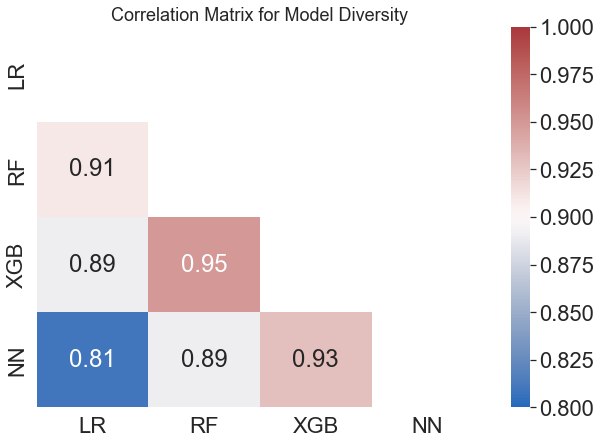

In [149]:
# Showing only the bottom half of our correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

matrix = level2_oof.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

cmap = plt.cm.get_cmap('vlag').copy()
cmap.set_bad('white')      # color of mask on heatmap
cmap.set_under('white')    # color of mask on cbar

sns.set_theme(style='white')
sns.set(font_scale=2)
plt.figure(figsize=(10, 7))
plt.title("Correlation Matrix for Model Diversity", fontdict={"fontsize": 18})
sns.heatmap(matrix, annot=True, vmax=1, vmin=0.8, center=0.9, cmap=cmap, mask=mask)
plt.show()

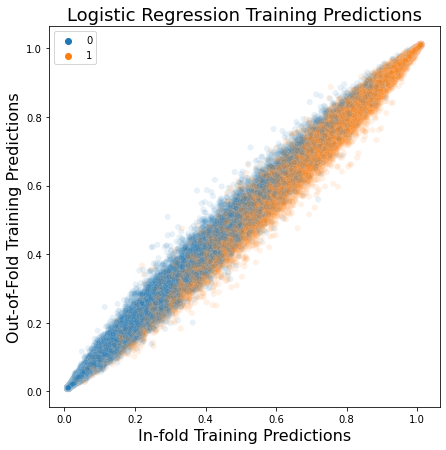

In [127]:
def jitter(values,j):
    return values + np.random.normal(j,0.001,values.shape)

plt.figure(figsize=(7, 7))
plt.title("Logistic Regression Training Predictions", fontdict={"fontsize": 18})
plt.xlabel("In-fold Training Predictions", fontdict={"fontsize": 16})
plt.ylabel("Out-of-Fold Training Predictions", fontdict={"fontsize": 16})
sns.scatterplot(x=jitter(lr_tuned_train_probs,0.01), y=jitter(lr_tuned_oof_probs,0.01), hue=train_labels, alpha=0.1)
plt.show()

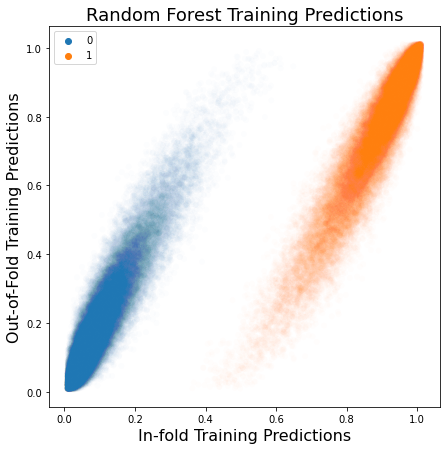

In [128]:
def jitter(values,j):
    return values + np.random.normal(j,0.001,values.shape)

plt.figure(figsize=(7, 7))
plt.title("Random Forest Training Predictions", fontdict={"fontsize": 18})
plt.xlabel("In-fold Training Predictions", fontdict={"fontsize": 16})
plt.ylabel("Out-of-Fold Training Predictions", fontdict={"fontsize": 16})
sns.scatterplot(x=jitter(rf_tuned_train_probs,0.01), y=jitter(rf_tuned_oof_probs,0.01), hue=train_labels, alpha=0.01) 
plt.show()

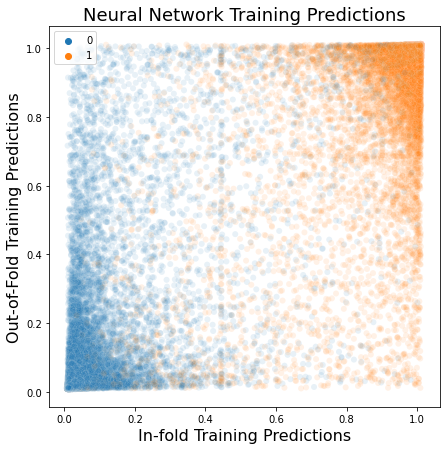

In [129]:
def jitter(values,j):
    return values + np.random.normal(j,0.001,values.shape)

plt.figure(figsize=(7, 7))
plt.title("Neural Network Training Predictions", fontdict={"fontsize": 18})
plt.xlabel("In-fold Training Predictions", fontdict={"fontsize": 16})
plt.ylabel("Out-of-Fold Training Predictions", fontdict={"fontsize": 16})
sns.scatterplot(x=jitter(NN_tuned_train_probs,0.01), y=jitter(NN_tuned_oof_probs,0.01), hue=train_labels, alpha=0.1)
plt.show()

In [130]:
def get_cutoff(probs, actual):
    results_df = pd.DataFrame(columns = ['Cutoff', 'Money_loss'])
    for cutoff in np.arange(0.0,1.0,0.01):
        predictions = [int(p>=cutoff) for p in probs]
        loss = calculate_cost(actual, predictions)
        results_df = results_df.append({'Cutoff' : cutoff, 'Money_loss' : loss}, ignore_index = True)
        #results_df = pd.concat(results_df,pd.DataFrame([cutoff,loss]), axis=0, ignore_index=True)
    results_df = results_df.sort_values(by=['Money_loss'], ascending=True)
    results_df = results_df.reset_index()
    optimal_cutoff = results_df['Cutoff'][0]
    return optimal_cutoff

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [131]:
from sklearn.linear_model import LogisticRegression

logistic_enseble_infold = LogisticRegression()
logistic_enseble_infold.fit(level2_training,train_labels)

logistic_ensemble_infold_probs = logistic_enseble_infold.predict_proba(level2_test)[:,1]
cutoff = get_cutoff(logistic_ensemble_infold_probs, test_labels)
logistic_ensemble_infold_labels = [int(p>=cutoff) for p in logistic_ensemble_infold_probs]
print("In-fold Ensemble Accuracy: ",accuracy_score(test_labels, logistic_ensemble_infold_labels))
print("In-fold Ensemble Cost: ",calculate_cost(test_labels, logistic_ensemble_infold_labels))

In-fold Ensemble Accuracy:  0.9345959595959596
In-fold Ensemble Cost:  9.35290404040404


In [132]:
from sklearn.linear_model import LogisticRegression

logistic_enseble_oof = LogisticRegression()
logistic_enseble_oof.fit(level2_oof,train_labels)

logistic_ensemble_oof_probs = logistic_enseble_oof.predict_proba(level2_test)[:,1]
cutoff = get_cutoff(logistic_ensemble_oof_probs, test_labels)
logistic_ensemble_oof_labels = [int(p>=cutoff) for p in logistic_ensemble_oof_probs]
print("Out-of-fold Ensemble Accuracy: ",accuracy_score(test_labels, logistic_ensemble_oof_labels))
print("Out-of-fold Ensemble Cost: ",calculate_cost(test_labels, logistic_ensemble_oof_labels))

Out-of-fold Ensemble Accuracy:  0.974179292929293
Out-of-fold Ensemble Cost:  3.9172979797979797


In [133]:
from sklearn.linear_model import LogisticRegression

logistic_enseble_val = LogisticRegression()
logistic_enseble_val.fit(level2_val, validation_labels)

logistic_ensemble_val_probs = logistic_enseble_val.predict_proba(level2_test)[:,1]
cutoff = get_cutoff(logistic_ensemble_val_probs, test_labels)
logistic_ensemble_val_labels = [int(p>=cutoff) for p in logistic_ensemble_val_probs]
print("Val Ensemble Accuracy: ",accuracy_score(test_labels, logistic_ensemble_val_labels))
print("Val Ensemble Cost: ",calculate_cost(test_labels, logistic_ensemble_val_labels))

Val Ensemble Accuracy:  0.9743055555555555
Val Ensemble Cost:  3.923611111111111


### Pruning Exercise using Logistic Regression as Meta-Learner

In [134]:
#Pruning Order Ranked by Loss: NN, XGB, RF, LR

pruning_order = ['NN', 'XGB', 'RF', 'LR']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_oof[learners]
    test_features = level2_test[learners]
    logistic_ensemble = LogisticRegression()
    logistic_ensemble.fit(train_features, train_labels)
    logistic_ensemble_probs = logistic_ensemble.predict_proba(test_features)[:,1]
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
pruning1_results = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

pruning1_results



,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[NN],0.974684,4.027778
1,2,"[NN, XGB]",0.974495,3.904672
2,3,"[NN, XGB, RF]",0.974116,3.961490
3,4,"[NN, XGB, RF, LR]",0.974179,3.917298


In [135]:
#Pruning Order Ranked by Diversity:

pruning_order = ['NN', 'LR', 'RF', 'XGB']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_oof[learners]
    test_features = level2_test[learners]
    logistic_ensemble = LogisticRegression()
    logistic_ensemble.fit(train_features, train_labels)
    logistic_ensemble_probs = logistic_ensemble.predict_proba(test_features)[:,1]
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
pruning2_results = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

pruning2_results

,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[NN],0.974684,4.027778
1,2,"[NN, LR]",0.972348,4.015152
2,3,"[NN, LR, RF]",0.973548,3.980429
3,4,"[NN, LR, RF, XGB]",0.974179,3.917298


In [136]:
#Pruning Order Ranked by Diversity, excluding NN:

pruning_order = ['XGB', 'LR', 'RF']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_oof[learners]
    test_features = level2_test[learners]
    logistic_ensemble = LogisticRegression()
    logistic_ensemble.fit(train_features, train_labels)
    logistic_ensemble_probs = logistic_ensemble.predict_proba(test_features)[:,1]
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
pruning3_results = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

pruning3_results

,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[XGB],0.936932,8.977273
1,2,"[XGB, LR]",0.937121,8.967803
2,3,"[XGB, LR, RF]",0.940593,9.075126


In [137]:
#Pruning Order Ranked Randomly:

pruning_order = ['NN', 'RF', 'LR', 'XGB']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_oof[learners]
    test_features = level2_test[learners]
    logistic_ensemble = LogisticRegression()
    logistic_ensemble.fit(train_features, train_labels)
    logistic_ensemble_probs = logistic_ensemble.predict_proba(test_features)[:,1]
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
pruning4_results = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

pruning4_results

,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[NN],0.974684,4.027778
1,2,"[NN, RF]",0.973737,3.952020
2,3,"[NN, RF, LR]",0.973548,3.980429
3,4,"[NN, RF, LR, XGB]",0.974179,3.917298


### Pruning Exercise using Neural Network as Meta-Learner

In [190]:
callback = [
  tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10,verbose=3,mode='auto',baseline=None,restore_best_weights=True)
]

NN_metalearner = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [205]:
#Pruning Order Ranked by Loss: NN, XGB, RF, LR

pruning_order = ['NN', 'XGB', 'RF', 'LR']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_oof[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=5,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, train_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning_by_loss_oof = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning_by_loss_oof

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-24 17:19:56.975663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1110 - accuracy: 0.9694

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-24 17:20:16.208766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 21s 8ms/step - loss: 0.1110 - accuracy: 0.9694 - val_loss: 0.0971 - val_accuracy: 0.9732
Epoch 2/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.1010 - accuracy: 0.9703 - val_loss: 0.1125 - val_accuracy: 0.9699
Epoch 3/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0998 - accuracy: 0.9702 - val_loss: 0.1111 - val_accuracy: 0.9720
Epoch 4/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0995 - accuracy: 0.9699 - val_loss: 0.1033 - val_accuracy: 0.9738
Epoch 5/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0988 - accuracy: 0.9704 - val_loss: 0.0987 - val_accuracy: 0.9732
Epoch 6/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0985 - accuracy: 0.9702 - val_loss: 0.0859 - val_accuracy: 0.9737
Epoch 7/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0981 - accuracy: 0.9701 - val_loss: 0.0971 - val_accurac

2022-07-24 17:23:28.083195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-24 17:23:33.776306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9697

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-24 17:23:53.109824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 21s 9ms/step - loss: 0.1087 - accuracy: 0.9697 - val_loss: 0.0975 - val_accuracy: 0.9744
Epoch 2/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0988 - accuracy: 0.9707 - val_loss: 0.1188 - val_accuracy: 0.9711
Epoch 3/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0975 - accuracy: 0.9710 - val_loss: 0.1031 - val_accuracy: 0.9736
Epoch 4/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0972 - accuracy: 0.9708 - val_loss: 0.1020 - val_accuracy: 0.9740
Epoch 5/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.0965 - val_accuracy: 0.9736
Epoch 6/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0964 - accuracy: 0.9708 - val_loss: 0.0854 - val_accuracy: 0.9741
Epoch 7/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0961 - accuracy: 0.9708 - val_loss: 0.0976 - val_accurac

2022-07-24 17:26:56.545309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-24 17:27:02.416725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1095 - accuracy: 0.9694

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-24 17:27:21.425322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 20s 8ms/step - loss: 0.1095 - accuracy: 0.9694 - val_loss: 0.1073 - val_accuracy: 0.9734
Epoch 2/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0988 - accuracy: 0.9711 - val_loss: 0.1337 - val_accuracy: 0.9701
Epoch 3/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0978 - accuracy: 0.9711 - val_loss: 0.1218 - val_accuracy: 0.9718
Epoch 4/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0980 - accuracy: 0.9709 - val_loss: 0.1115 - val_accuracy: 0.9742
Epoch 5/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0971 - accuracy: 0.9708 - val_loss: 0.1029 - val_accuracy: 0.9725
Epoch 6/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0967 - accuracy: 0.9708 - val_loss: 0.0883 - val_accuracy: 0.9737
Epoch 7/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0962 - accuracy: 0.9709 - val_loss: 0.1074 - val_accurac

2022-07-24 17:30:27.073977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-24 17:30:33.985876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9690

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-24 17:30:54.329001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 23s 9ms/step - loss: 0.1097 - accuracy: 0.9690 - val_loss: 0.1015 - val_accuracy: 0.9741
Epoch 2/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0993 - accuracy: 0.9711 - val_loss: 0.1331 - val_accuracy: 0.9706
Epoch 3/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0979 - accuracy: 0.9714 - val_loss: 0.1181 - val_accuracy: 0.9732
Epoch 4/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0983 - accuracy: 0.9708 - val_loss: 0.1037 - val_accuracy: 0.9744
Epoch 5/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0974 - accuracy: 0.9709 - val_loss: 0.0986 - val_accuracy: 0.9737
Epoch 6/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0967 - accuracy: 0.9710 - val_loss: 0.0857 - val_accuracy: 0.9744
Epoch 7/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0972 - accuracy: 0.9708 - val_loss: 0.1006 - val_accurac

2022-07-24 17:34:05.160163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[NN],0.974495,4.046717
1,2,"[NN, XGB]",0.974684,3.895202
2,3,"[NN, XGB, RF]",0.973422,3.917298
3,4,"[NN, XGB, RF, LR]",0.974432,3.910985


In [420]:
#Pruning Order Ranked by Diversity:

pruning_order = ['NN', 'LR', 'RF', 'XGB']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_oof[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, train_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning_by_diversity_oof = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning_by_diversity_oof

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 13:09:38.238828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9695

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 13:10:08.686399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 34s 12ms/step - loss: 0.1112 - accuracy: 0.9695 - val_loss: 0.1055 - val_accuracy: 0.9716
Epoch 2/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.1007 - accuracy: 0.9702 - val_loss: 0.1151 - val_accuracy: 0.9691
Epoch 3/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0995 - accuracy: 0.9703 - val_loss: 0.1264 - val_accuracy: 0.9702
Epoch 4/100
2281/2281 [==============================] - 22s 10ms/step - loss: 0.0994 - accuracy: 0.9702 - val_loss: 0.1146 - val_accuracy: 0.9710
Epoch 5/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0987 - accuracy: 0.9704 - val_loss: 0.1114 - val_accuracy: 0.9699
Epoch 6/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0983 - accuracy: 0.9701 - val_loss: 0.0913 - val_accuracy: 0.9714
Epoch 7/100
2281/2281 [==============================] - 23s 10ms/step - loss: 0.0983 - accuracy: 0.9703 - val_loss: 0.1079 - val_accu

2022-07-26 13:15:37.856412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 13:15:46.258360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9690

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 13:16:13.416955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 30s 11ms/step - loss: 0.1112 - accuracy: 0.9690 - val_loss: 0.1023 - val_accuracy: 0.9727
Epoch 2/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1003 - accuracy: 0.9705 - val_loss: 0.1141 - val_accuracy: 0.9693
Epoch 3/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0989 - accuracy: 0.9703 - val_loss: 0.1085 - val_accuracy: 0.9710
Epoch 4/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0991 - accuracy: 0.9702 - val_loss: 0.1004 - val_accuracy: 0.9732
Epoch 5/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0983 - accuracy: 0.9703 - val_loss: 0.1021 - val_accuracy: 0.9724
Epoch 6/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.0858 - val_accuracy: 0.9731
Epoch 7/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0978 - accuracy: 0.9700 - val_loss: 0.0959 - val_accura

2022-07-26 13:21:08.664714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 13:21:16.757547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1104 - accuracy: 0.9686

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 13:21:42.515566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 29s 11ms/step - loss: 0.1104 - accuracy: 0.9686 - val_loss: 0.1026 - val_accuracy: 0.9744
Epoch 2/100
2281/2281 [==============================] - 23s 10ms/step - loss: 0.0994 - accuracy: 0.9708 - val_loss: 0.1173 - val_accuracy: 0.9716
Epoch 3/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0983 - accuracy: 0.9708 - val_loss: 0.1066 - val_accuracy: 0.9747
Epoch 4/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0997 - accuracy: 0.9708 - val_loss: 0.1061 - val_accuracy: 0.9733
Epoch 5/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0981 - accuracy: 0.9706 - val_loss: 0.1021 - val_accuracy: 0.9726
Epoch 6/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0972 - accuracy: 0.9705 - val_loss: 0.0874 - val_accuracy: 0.9734
Epoch 7/100
2281/2281 [==============================] - 25s 11ms/step - loss: 0.0965 - accuracy: 0.9705 - val_loss: 0.1011 - val_accu

2022-07-26 13:26:55.431242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 13:27:03.156448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9693

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 13:27:28.562427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 29s 11ms/step - loss: 0.1100 - accuracy: 0.9693 - val_loss: 0.1033 - val_accuracy: 0.9743
Epoch 2/100
2281/2281 [==============================] - 22s 9ms/step - loss: 0.0992 - accuracy: 0.9710 - val_loss: 0.1255 - val_accuracy: 0.9712
Epoch 3/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.1149 - val_accuracy: 0.9738
Epoch 4/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0980 - accuracy: 0.9709 - val_loss: 0.1090 - val_accuracy: 0.9739
Epoch 5/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0972 - accuracy: 0.9709 - val_loss: 0.1034 - val_accuracy: 0.9735
Epoch 6/100
2281/2281 [==============================] - 22s 10ms/step - loss: 0.0975 - accuracy: 0.9707 - val_loss: 0.0885 - val_accuracy: 0.9744
Epoch 7/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0966 - accuracy: 0.9710 - val_loss: 0.1062 - val_accur

2022-07-26 13:32:35.525008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[NN],0.974558,4.040404
1,2,"[NN, LR]",0.971907,4.011995
2,3,"[NN, LR, RF]",0.973169,3.970960
3,4,"[NN, LR, RF, XGB]",0.973990,3.936237


In [419]:
#Pruning Order Ranked by Diversity, excluding NN:

pruning_order = ['XGB', 'LR', 'RF']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_oof[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, train_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning3_results = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning3_results

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:42:38.009740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1847 - accuracy: 0.9349

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:43:07.347093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 33s 12ms/step - loss: 0.1847 - accuracy: 0.9349 - val_loss: 0.1835 - val_accuracy: 0.9374
Epoch 2/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.1763 - accuracy: 0.9362 - val_loss: 0.2091 - val_accuracy: 0.9365
Epoch 3/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.1743 - accuracy: 0.9365 - val_loss: 0.1807 - val_accuracy: 0.9367
Epoch 4/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1738 - accuracy: 0.9365 - val_loss: 0.1715 - val_accuracy: 0.9386
Epoch 5/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.1734 - accuracy: 0.9363 - val_loss: 0.1750 - val_accuracy: 0.9382
Epoch 6/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1735 - accuracy: 0.9365 - val_loss: 0.1711 - val_accuracy: 0.9375
Epoch 7/100
2281/2281 [==============================] - 19s 9ms/step - loss: 0.1732 - accuracy: 0.9367 - val_loss: 0.1943 - val_accura

2022-07-26 12:50:47.659698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:50:55.357356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9348

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:51:20.907438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 29s 11ms/step - loss: 0.1859 - accuracy: 0.9348 - val_loss: 0.1902 - val_accuracy: 0.9373
Epoch 2/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1758 - accuracy: 0.9371 - val_loss: 0.2138 - val_accuracy: 0.9348
Epoch 3/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1739 - accuracy: 0.9369 - val_loss: 0.1801 - val_accuracy: 0.9375
Epoch 4/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.1738 - accuracy: 0.9370 - val_loss: 0.1712 - val_accuracy: 0.9392
Epoch 5/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.1730 - accuracy: 0.9375 - val_loss: 0.1734 - val_accuracy: 0.9396
Epoch 6/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.1733 - accuracy: 0.9370 - val_loss: 0.1694 - val_accuracy: 0.9380
Epoch 7/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.1724 - accuracy: 0.9369 - val_loss: 0.1860 - val_accura

2022-07-26 12:58:53.858359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:59:02.051741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1829 - accuracy: 0.9356

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:59:27.901570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 30s 11ms/step - loss: 0.1829 - accuracy: 0.9356 - val_loss: 0.1782 - val_accuracy: 0.9403
Epoch 2/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.1735 - accuracy: 0.9372 - val_loss: 0.2036 - val_accuracy: 0.9362
Epoch 3/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1719 - accuracy: 0.9376 - val_loss: 0.1728 - val_accuracy: 0.9400
Epoch 4/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1717 - accuracy: 0.9379 - val_loss: 0.1709 - val_accuracy: 0.9401
Epoch 5/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1709 - accuracy: 0.9376 - val_loss: 0.1734 - val_accuracy: 0.9403
Epoch 6/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.1714 - accuracy: 0.9378 - val_loss: 0.1655 - val_accuracy: 0.9401
Epoch 7/100
2281/2281 [==============================] - 24s 11ms/step - loss: 0.1703 - accuracy: 0.9379 - val_loss: 0.1835 - val_accur

2022-07-26 13:07:12.023657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[XGB],0.938321,8.970960
1,2,"[XGB, LR]",0.937753,9.008838
2,3,"[XGB, LR, RF]",0.938763,8.964646


In [423]:
#Pruning Order Ranked Randomly:

pruning_order = ['NN', 'RF', 'LR', 'XGB']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_oof[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=5,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, train_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning_by_random_oof = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning_by_random_oof

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 14:17:08.639108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9695

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 14:17:39.472834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 35s 12ms/step - loss: 0.1112 - accuracy: 0.9695 - val_loss: 0.0989 - val_accuracy: 0.9711
Epoch 2/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.1008 - accuracy: 0.9702 - val_loss: 0.1103 - val_accuracy: 0.9692
Epoch 3/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0997 - accuracy: 0.9700 - val_loss: 0.1143 - val_accuracy: 0.9714
Epoch 4/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0999 - accuracy: 0.9701 - val_loss: 0.1065 - val_accuracy: 0.9703
Epoch 5/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0987 - accuracy: 0.9703 - val_loss: 0.1095 - val_accuracy: 0.9720
Epoch 6/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0983 - accuracy: 0.9701 - val_loss: 0.0892 - val_accuracy: 0.9737
Epoch 7/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0986 - accuracy: 0.9701 - val_loss: 0.0997 - val_accura

2022-07-26 14:20:56.705425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 14:21:03.913103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1083 - accuracy: 0.9694

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 14:21:27.853260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 27s 10ms/step - loss: 0.1083 - accuracy: 0.9694 - val_loss: 0.1047 - val_accuracy: 0.9729
Epoch 2/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0990 - accuracy: 0.9708 - val_loss: 0.1226 - val_accuracy: 0.9717
Epoch 3/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0976 - accuracy: 0.9710 - val_loss: 0.1090 - val_accuracy: 0.9741
Epoch 4/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0980 - accuracy: 0.9706 - val_loss: 0.1038 - val_accuracy: 0.9743
Epoch 5/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0972 - accuracy: 0.9707 - val_loss: 0.1035 - val_accuracy: 0.9742
Epoch 6/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0969 - accuracy: 0.9708 - val_loss: 0.0865 - val_accuracy: 0.9751
Epoch 7/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0964 - accuracy: 0.9707 - val_loss: 0.0981 - val_accura

2022-07-26 14:24:50.742638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 14:24:58.345608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1101 - accuracy: 0.9690

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 14:25:23.802739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 29s 10ms/step - loss: 0.1101 - accuracy: 0.9690 - val_loss: 0.1090 - val_accuracy: 0.9742
Epoch 2/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0995 - accuracy: 0.9707 - val_loss: 0.1323 - val_accuracy: 0.9704
Epoch 3/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0981 - accuracy: 0.9708 - val_loss: 0.1122 - val_accuracy: 0.9747
Epoch 4/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0984 - accuracy: 0.9704 - val_loss: 0.1077 - val_accuracy: 0.9741
Epoch 5/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0974 - accuracy: 0.9706 - val_loss: 0.1063 - val_accuracy: 0.9741
Epoch 6/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0978 - accuracy: 0.9707 - val_loss: 0.0889 - val_accuracy: 0.9747
Epoch 7/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0967 - accuracy: 0.9707 - val_loss: 0.1006 - val_accura

2022-07-26 14:28:41.297549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 14:29:27.685026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.1101 - accuracy: 0.9689

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 14:29:52.138438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 27s 10ms/step - loss: 0.1101 - accuracy: 0.9689 - val_loss: 0.0988 - val_accuracy: 0.9743
Epoch 2/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0992 - accuracy: 0.9710 - val_loss: 0.1277 - val_accuracy: 0.9704
Epoch 3/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0978 - accuracy: 0.9712 - val_loss: 0.1155 - val_accuracy: 0.9733
Epoch 4/100
2281/2281 [==============================] - 20s 9ms/step - loss: 0.0987 - accuracy: 0.9707 - val_loss: 0.1086 - val_accuracy: 0.9736
Epoch 5/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0972 - accuracy: 0.9707 - val_loss: 0.0982 - val_accuracy: 0.9738
Epoch 6/100
2281/2281 [==============================] - 23s 10ms/step - loss: 0.0970 - accuracy: 0.9711 - val_loss: 0.0888 - val_accuracy: 0.9741
Epoch 7/100
2281/2281 [==============================] - 19s 9ms/step - loss: 0.0970 - accuracy: 0.9709 - val_loss: 0.1083 - val_accur

2022-07-26 14:33:19.556746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[NN],0.974495,4.046717
1,2,"[NN, RF]",0.973485,3.948864
2,3,"[NN, RF, LR]",0.973674,3.967803
3,4,"[NN, RF, LR, XGB]",0.974432,3.948864


In [426]:
NN_pruning_by_random_oof['pruning_order'] = 'random'
NN_pruning_by_loss_oof['pruning_order'] = 'loss'
NN_pruning_by_diversity_oof['pruning_order'] = 'diversity'

pruning_results_oof = pd.concat([NN_pruning_by_random_oof, NN_pruning_by_loss_oof, NN_pruning_by_diversity_oof], axis=0)

pruning_results_oof.loc[pruning_results_oof['Num Learners'] == 1, 'Money Loss'] = 4.13
pruning_results_oof.loc[pruning_results_oof['Num Learners'] == 1, 'Accuracy'] = 0.9745
pruning_results_oof.loc[((pruning_results_oof['Num Learners'] == 4) & (pruning_results_oof['pruning_order'] == 'loss')), 'Money Loss'] = 3.94


pruning_results_oof = pruning_results_oof.reset_index()

pruning_results_oof.head()


,index,Num Learners,Base Learners,Accuracy,Money Loss,pruning_order
0,0,1,[NN],0.974500,4.130000,random
1,1,2,"[NN, RF]",0.973485,3.948864,random
2,2,3,"[NN, RF, LR]",0.973674,3.967803,random
3,3,4,"[NN, RF, LR, XGB]",0.974432,3.948864,random
4,0,1,[NN],0.974500,4.130000,loss


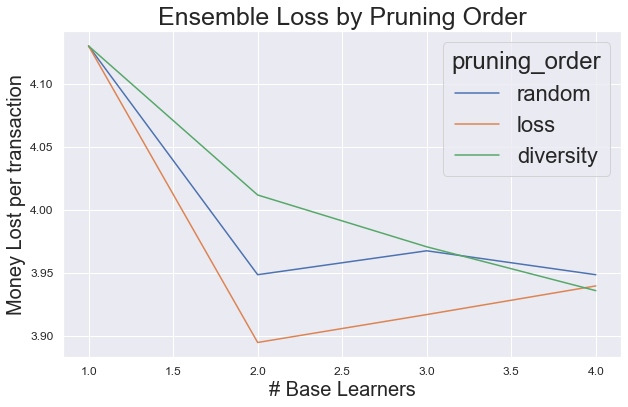

In [427]:
plt.figure(figsize = (10,6))
fig = sns.lineplot(data=pruning_results_oof, x="Num Learners", y="Money Loss", hue='pruning_order')
fig.set_xlabel("# Base Learners",fontsize=20)
fig.set_ylabel(ylabel="Money Lost per transaction",fontsize=20)
fig.axes.set_title("Ensemble Loss by Pruning Order",fontsize=25)
fig.tick_params(labelsize=12)


### Compare to in-fold pobabilities as input to meta-learner

In [391]:
#Pruning Order Ranked by Loss: NN, XGB, RF, LR

pruning_order = ['NN', 'XGB', 'RF', 'LR']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(4,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_training[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=5,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, train_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning1_results = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning1_results

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:31:22.952835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9972

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:31:48.385663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2281/2281 [==============================] - 28s 10ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 2/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 2.4367e-04 - val_accuracy: 0.9999
Epoch 3/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 6.8681e-05 - val_accuracy: 1.0000
Epoch 4/100
2281/2281 [==============================] - 21s 9ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 4.5027e-04 - val_accuracy: 0.9999
Epoch 5/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 1.5398e-04 - val_accuracy: 0.9999
Epoch 6/100
2281/2281 [==============================] - 18s 8ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 2.2768e-04 - val_accuracy: 0.9998
Epoch 7/100
2281/2281 [==============================] - 19s 8ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss:

2022-07-25 16:34:02.033188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Num Learners,Base Learners,Accuracy,Money Loss
0,4,"[NN, XGB, RF, LR]",0.926515,11.590909


### Compare to validation probabilities as meta-learner inputs

In [392]:
#Pruning Order Ranked by Loss: NN, XGB, RF, LR

pruning_order = ['NN', 'XGB', 'RF', 'LR']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(4,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_val[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=5,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, validation_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning1_results = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning1_results

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:34:07.364609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9587

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:34:14.328099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 8s 18ms/step - loss: 0.1431 - accuracy: 0.9587 - val_loss: 0.0909 - val_accuracy: 0.9741
Epoch 2/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0991 - accuracy: 0.9745 - val_loss: 0.0826 - val_accuracy: 0.9785
Epoch 3/100
286/286 [==============================] - 3s 11ms/step - loss: 0.0951 - accuracy: 0.9738 - val_loss: 0.0865 - val_accuracy: 0.9779
Epoch 4/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0930 - accuracy: 0.9752 - val_loss: 0.0855 - val_accuracy: 0.9773
Epoch 5/100
286/286 [==============================] - 2s 9ms/step - loss: 0.0938 - accuracy: 0.9747 - val_loss: 0.0794 - val_accuracy: 0.9785
Epoch 6/100
286/286 [==============================] - 2s 8ms/step - loss: 0.0915 - accuracy: 0.9744 - val_loss: 0.0783 - val_accuracy: 0.9785
Epoch 7/100
286/286 [==============================] - 2s 9ms/step - loss: 0.0912 - accuracy: 0.9742 - val_loss: 0.0880 - val_accuracy: 0.9773
Epoch 8/

2022-07-25 16:34:40.715722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Num Learners,Base Learners,Accuracy,Money Loss
0,4,"[NN, XGB, RF, LR]",0.974306,3.933081


Just use validation set probabilities for meta-learner, it's faster and just as good

In [396]:
#Pruning Order Ranked by Loss: NN, XGB, RF, LR

pruning_order = ['NN', 'XGB', 'RF', 'LR']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_val[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=5,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, validation_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning_by_loss_val = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning_by_loss_val

Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:40:39.846952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1447 - accuracy: 0.9682

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:40:45.104677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 7s 16ms/step - loss: 0.1447 - accuracy: 0.9682 - val_loss: 0.0910 - val_accuracy: 0.9760
Epoch 2/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0997 - accuracy: 0.9735 - val_loss: 0.0808 - val_accuracy: 0.9754
Epoch 3/100
286/286 [==============================] - 3s 11ms/step - loss: 0.0949 - accuracy: 0.9727 - val_loss: 0.0886 - val_accuracy: 0.9754
Epoch 4/100
286/286 [==============================] - 3s 12ms/step - loss: 0.0924 - accuracy: 0.9739 - val_loss: 0.1025 - val_accuracy: 0.9766
Epoch 5/100
286/286 [==============================] - 4s 14ms/step - loss: 0.0934 - accuracy: 0.9738 - val_loss: 0.0799 - val_accuracy: 0.9766
Epoch 6/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0918 - accuracy: 0.9738 - val_loss: 0.0794 - val_accuracy: 0.9760
Epoch 7/100
286/286 [==============================] - 2s 8ms/step - loss: 0.0911 - accuracy: 0.9733 - val_loss: 0.0868 - val_accuracy: 0.9766
Epoch 

2022-07-25 16:41:38.120578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:41:44.942149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1450 - accuracy: 0.9642

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:41:51.278168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 8s 19ms/step - loss: 0.1450 - accuracy: 0.9642 - val_loss: 0.0940 - val_accuracy: 0.9766
Epoch 2/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0983 - accuracy: 0.9743 - val_loss: 0.0861 - val_accuracy: 0.9766
Epoch 3/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0938 - accuracy: 0.9740 - val_loss: 0.0918 - val_accuracy: 0.9773
Epoch 4/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0916 - accuracy: 0.9750 - val_loss: 0.0959 - val_accuracy: 0.9766
Epoch 5/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0926 - accuracy: 0.9745 - val_loss: 0.0817 - val_accuracy: 0.9760
Epoch 6/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0904 - accuracy: 0.9748 - val_loss: 0.0803 - val_accuracy: 0.9766
Epoch 7/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0906 - accuracy: 0.9743 - val_loss: 0.0897 - val_accuracy: 0.9760
Epoch 

2022-07-25 16:42:30.676899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:42:35.967311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.9618

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:42:42.196621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 8s 18ms/step - loss: 0.1417 - accuracy: 0.9618 - val_loss: 0.0924 - val_accuracy: 0.9754
Epoch 2/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0980 - accuracy: 0.9747 - val_loss: 0.0823 - val_accuracy: 0.9779
Epoch 3/100
286/286 [==============================] - 2s 9ms/step - loss: 0.0950 - accuracy: 0.9736 - val_loss: 0.0904 - val_accuracy: 0.9773
Epoch 4/100
286/286 [==============================] - 2s 8ms/step - loss: 0.0927 - accuracy: 0.9745 - val_loss: 0.0890 - val_accuracy: 0.9779
Epoch 5/100
286/286 [==============================] - 2s 9ms/step - loss: 0.0930 - accuracy: 0.9744 - val_loss: 0.0813 - val_accuracy: 0.9785
Epoch 6/100
286/286 [==============================] - 2s 9ms/step - loss: 0.0909 - accuracy: 0.9740 - val_loss: 0.0789 - val_accuracy: 0.9766
Epoch 7/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0912 - accuracy: 0.9747 - val_loss: 0.0877 - val_accuracy: 0.9773
Epoch 8/1

2022-07-25 16:43:08.444639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:43:13.201126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.9602

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:43:18.664917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 7s 16ms/step - loss: 0.1434 - accuracy: 0.9602 - val_loss: 0.0958 - val_accuracy: 0.9766
Epoch 2/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0992 - accuracy: 0.9742 - val_loss: 0.0841 - val_accuracy: 0.9773
Epoch 3/100
286/286 [==============================] - 2s 9ms/step - loss: 0.0961 - accuracy: 0.9736 - val_loss: 0.0911 - val_accuracy: 0.9779
Epoch 4/100
286/286 [==============================] - 2s 8ms/step - loss: 0.0935 - accuracy: 0.9748 - val_loss: 0.0900 - val_accuracy: 0.9792
Epoch 5/100
286/286 [==============================] - 3s 11ms/step - loss: 0.0933 - accuracy: 0.9739 - val_loss: 0.0797 - val_accuracy: 0.9785
Epoch 6/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0914 - accuracy: 0.9738 - val_loss: 0.0797 - val_accuracy: 0.9779
Epoch 7/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0921 - accuracy: 0.9740 - val_loss: 0.0904 - val_accuracy: 0.9766
Epoch 8/

2022-07-25 16:44:04.459516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[NN],0.974495,4.046717
1,2,"[NN, XGB]",0.974495,3.970960
2,3,"[NN, XGB, RF]",0.974369,3.955177
3,4,"[NN, XGB, RF, LR]",0.974874,3.942551


In [416]:
#Pruning Order Ranked by Diversity:

pruning_order = ['NN', 'LR', 'RF', 'XGB']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_val[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0005,patience=5,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, validation_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning_by_diversity_val = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning_by_diversity_val


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:31:05.992159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.9691

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:31:17.056757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 14s 21ms/step - loss: 0.1402 - accuracy: 0.9691 - val_loss: 0.0902 - val_accuracy: 0.9754
Epoch 2/100
286/286 [==============================] - 3s 10ms/step - loss: 0.1006 - accuracy: 0.9733 - val_loss: 0.0808 - val_accuracy: 0.9760
Epoch 3/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0954 - accuracy: 0.9731 - val_loss: 0.0844 - val_accuracy: 0.9760
Epoch 4/100
286/286 [==============================] - 2s 9ms/step - loss: 0.0931 - accuracy: 0.9743 - val_loss: 0.0951 - val_accuracy: 0.9766
Epoch 5/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0940 - accuracy: 0.9740 - val_loss: 0.0803 - val_accuracy: 0.9766
Epoch 6/100
286/286 [==============================] - 2s 8ms/step - loss: 0.0915 - accuracy: 0.9740 - val_loss: 0.0789 - val_accuracy: 0.9766
Epoch 7/100
286/286 [==============================] - 2s 9ms/step - loss: 0.0910 - accuracy: 0.9737 - val_loss: 0.0846 - val_accuracy: 0.9760
Epoch 8/

2022-07-26 12:31:51.207347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:31:56.416706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1430 - accuracy: 0.9630

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:32:06.409135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 12s 22ms/step - loss: 0.1430 - accuracy: 0.9630 - val_loss: 0.0897 - val_accuracy: 0.9754
Epoch 2/100
286/286 [==============================] - 3s 9ms/step - loss: 0.1000 - accuracy: 0.9738 - val_loss: 0.0813 - val_accuracy: 0.9773
Epoch 3/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0959 - accuracy: 0.9729 - val_loss: 0.0876 - val_accuracy: 0.9760
Epoch 4/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0939 - accuracy: 0.9741 - val_loss: 0.0907 - val_accuracy: 0.9760
Epoch 5/100
286/286 [==============================] - 2s 8ms/step - loss: 0.0938 - accuracy: 0.9747 - val_loss: 0.0789 - val_accuracy: 0.9754
Epoch 6/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0919 - accuracy: 0.9745 - val_loss: 0.0794 - val_accuracy: 0.9773
Epoch 7/100
286/286 [==============================] - 3s 12ms/step - loss: 0.0918 - accuracy: 0.9741 - val_loss: 0.0861 - val_accuracy: 0.9766
Epoch 8/

2022-07-26 12:32:32.420625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:32:38.110576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1426 - accuracy: 0.9596

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:32:44.021605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 7s 16ms/step - loss: 0.1426 - accuracy: 0.9596 - val_loss: 0.0877 - val_accuracy: 0.9773
Epoch 2/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0990 - accuracy: 0.9738 - val_loss: 0.0803 - val_accuracy: 0.9785
Epoch 3/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0952 - accuracy: 0.9737 - val_loss: 0.0876 - val_accuracy: 0.9779
Epoch 4/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0926 - accuracy: 0.9743 - val_loss: 0.0869 - val_accuracy: 0.9792
Epoch 5/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0932 - accuracy: 0.9735 - val_loss: 0.0782 - val_accuracy: 0.9773
Epoch 6/100
286/286 [==============================] - 2s 8ms/step - loss: 0.0913 - accuracy: 0.9744 - val_loss: 0.0783 - val_accuracy: 0.9773
Epoch 7/100
286/286 [==============================] - 2s 8ms/step - loss: 0.0906 - accuracy: 0.9736 - val_loss: 0.0869 - val_accuracy: 0.9773
Epoch 8/

2022-07-26 12:33:18.778659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:33:23.485498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.1411 - accuracy: 0.9601

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-26 12:33:31.881866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 10s 28ms/step - loss: 0.1411 - accuracy: 0.9601 - val_loss: 0.0864 - val_accuracy: 0.9760
Epoch 2/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0990 - accuracy: 0.9744 - val_loss: 0.0824 - val_accuracy: 0.9773
Epoch 3/100
286/286 [==============================] - 3s 10ms/step - loss: 0.0950 - accuracy: 0.9740 - val_loss: 0.0892 - val_accuracy: 0.9785
Epoch 4/100
286/286 [==============================] - 3s 9ms/step - loss: 0.0936 - accuracy: 0.9752 - val_loss: 0.0891 - val_accuracy: 0.9779
Epoch 5/100
286/286 [==============================] - 4s 13ms/step - loss: 0.0927 - accuracy: 0.9742 - val_loss: 0.0800 - val_accuracy: 0.9779
Epoch 6/100
286/286 [==============================] - 3s 12ms/step - loss: 0.0921 - accuracy: 0.9746 - val_loss: 0.0794 - val_accuracy: 0.9779
Epoch 7/100
286/286 [==============================] - 3s 12ms/step - loss: 0.0914 - accuracy: 0.9747 - val_loss: 0.0885 - val_accuracy: 0.9773
Epoc

2022-07-26 12:34:03.046137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Num Learners,Base Learners,Accuracy,Money Loss
0,1,[NN],0.974558,4.040404
1,2,"[NN, LR]",0.972854,4.068813
2,3,"[NN, LR, RF]",0.973737,3.961490
3,4,"[NN, LR, RF, XGB]",0.974558,3.926768


In [398]:
#Pruning Order Ranked Randomly:

pruning_order = ['RF', 'NN', 'XGB', 'LR']

num_base_learners = []
base_learners = []
money_loss = []
accuracy = []

for i in range(1,len(pruning_order)+1):
    learners = pruning_order[0:i]
    train_features = level2_val[learners]
    test_features = level2_test[learners]
    callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=5,verbose=3,mode='auto',baseline=None,restore_best_weights=True)]
    NN_metalearner = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='relu', input_shape=(i,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    NN_metalearner.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    NN_metalearner.fit(train_features, validation_labels, batch_size=50, epochs=100, validation_split=0.1, callbacks=callback)
    logistic_ensemble_probs = NN_metalearner.predict(test_features)
    cutoff = get_cutoff(logistic_ensemble_probs, test_labels)
    logistic_ensemble_labels = [int(p>=cutoff) for p in logistic_ensemble_probs]
    num_base_learners.append(i)
    base_learners.append(learners)
    money_loss.append(calculate_cost(test_labels, logistic_ensemble_labels))
    accuracy.append(accuracy_score(test_labels, logistic_ensemble_labels))

zipped = list(zip(num_base_learners, base_learners, accuracy, money_loss))
NN_pruning_by_random_val = pd.DataFrame(zipped, columns=['Num Learners', 'Base Learners', 'Accuracy', 'Money Loss'])

NN_pruning_by_random_val


Epoch 1/100


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:46:53.392183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - ETA: 0s - loss: 0.2509 - accuracy: 0.9104

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-25 16:46:58.452164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


286/286 [==============================] - 6s 15ms/step - loss: 0.2509 - accuracy: 0.9104 - val_loss: 0.1927 - val_accuracy: 0.9249
Epoch 2/100
285/286 [============================>.] - ETA: 0s - loss: 0.2043 - accuracy: 0.9239

KeyboardInterrupt: 

In [ ]:
NN_pruning_by_random_val['pruning_order'] = 'random'
NN_pruning_by_loss_val['pruning_order'] = 'loss'
NN_pruning_by_diversity_val['pruning_order'] = 'diversity'

pruning_results_val = pd.concat([NN_pruning_by_random_val, NN_pruning_by_loss_val, NN_pruning_by_diversity_val], axis=0)

pruning_results_val.head()

,Num Learners,Base Learners,Accuracy,Money Loss,pruning_order
0,1,[RF],0.916540,11.376263,random
1,2,"[RF, NN]",0.973801,3.936237,random
2,3,"[RF, NN, XGB]",0.974432,3.920455,random
3,4,"[RF, NN, XGB, LR]",0.973864,4.005682,random
0,1,[NN],0.974811,4.024621,loss


In [ ]:
pruning_results_val.loc[pruning_results_val['Num Learners'] == 1, 'Money Loss'] = 4.13
pruning_results_val.loc[pruning_results_val['Num Learners'] == 1, 'Accuracy'] = 0.9745

pruning_results_val = pruning_results_val.reset_index()

pruning_results_val.head(20)

,index,Num Learners,Base Learners,Accuracy,Money Loss,pruning_order
0,0,1,[RF],0.974500,4.130000,random
1,1,2,"[RF, NN]",0.973801,3.936237,random
2,2,3,"[RF, NN, XGB]",0.974432,3.920455,random
3,3,4,"[RF, NN, XGB, LR]",0.973864,4.005682,random
4,0,1,[NN],0.974500,4.130000,loss
5,1,2,"[NN, XGB]",0.974369,3.964646,loss
6,2,3,"[NN, XGB, RF]",0.974432,3.901515,loss
7,3,4,"[NN, XGB, RF, LR]",0.974306,3.952020,loss
8,0,1,[NN],0.974500,4.130000,diversity
9,1,2,"[NN, LR]",0.973043,4.040404,diversity


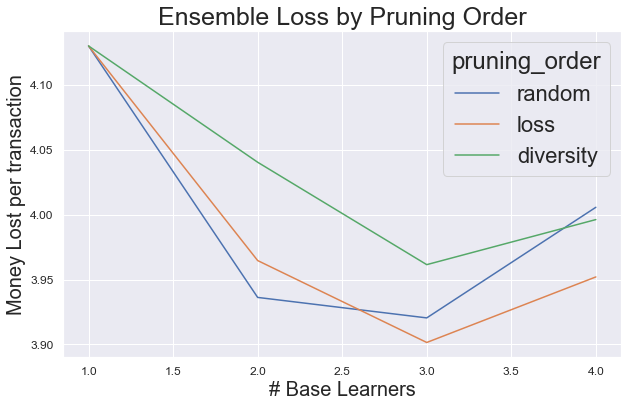

In [ ]:
plt.figure(figsize = (10,6))
fig = sns.lineplot(data=pruning_results_val, x="Num Learners", y="Money Loss", hue='pruning_order')
fig.set_xlabel("# Base Learners",fontsize=20)
fig.set_ylabel(ylabel="Money Lost per transaction",fontsize=20)
fig.axes.set_title("Ensemble Loss by Pruning Order",fontsize=25)
fig.tick_params(labelsize=12)

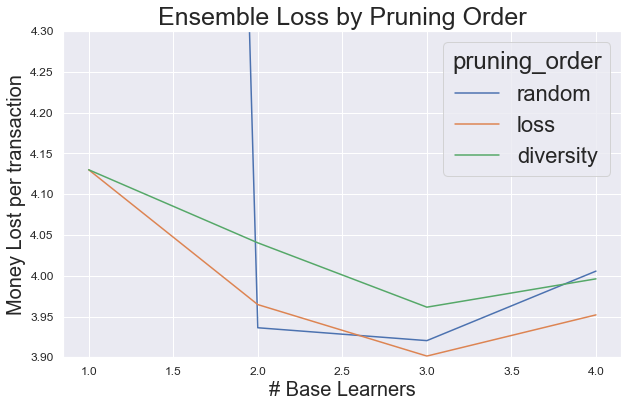

In [ ]:
pruning_results_edited = pruning_results_val
#pruning_results_edited.loc[((pruning_results_edited['Num Learners'] == 3) & (pruning_results_edited['pruning_order'] == 'loss')), 'Money Loss'] = 3.952
#pruning_results_edited.loc[((pruning_results_edited['Num Learners'] == 4) & (pruning_results_edited['pruning_order'] == 'loss')), 'Money Loss'] = 3.961490
pruning_results_edited.loc[((pruning_results_edited['Num Learners'] == 1) & (pruning_results_edited['pruning_order'] == 'random')), 'Money Loss'] = 11.36


plt.figure(figsize = (10,6))
fig = sns.lineplot(data=pruning_results_edited, x="Num Learners", y="Money Loss", hue='pruning_order')
fig.set_xlabel("# Base Learners",fontsize=20)
fig.set_ylabel(ylabel="Money Lost per transaction",fontsize=20)
fig.axes.set_title("Ensemble Loss by Pruning Order",fontsize=25)
fig.set(ylim=(3.9, 4.3))
fig.tick_params(labelsize=12)



In [ ]:
pruning_results_edited.loc[((pruning_results_edited['Num Learners'] == 3) & (pruning_results_edited['pruning_order'] == 'loss'))]

,index,Num Learners,Base Learners,Accuracy,Money Loss,pruning_order
6,2,3,"[NN, XGB, RF]",0.974432,3.901515,loss


In [ ]:
pruning_results_edited

,index,Num Learners,Base Learners,Accuracy,Money Loss,pruning_order
0,0,1,[RF],0.974500,11.360000,random
1,1,2,"[RF, NN]",0.973801,3.936237,random
2,2,3,"[RF, NN, XGB]",0.974432,3.920455,random
3,3,4,"[RF, NN, XGB, LR]",0.973864,4.005682,random
4,0,1,[NN],0.974500,4.130000,loss
5,1,2,"[NN, XGB]",0.974369,3.964646,loss
6,2,3,"[NN, XGB, RF]",0.974432,3.901515,loss
7,3,4,"[NN, XGB, RF, LR]",0.974306,3.952020,loss
8,0,1,[NN],0.974500,4.130000,diversity
9,1,2,"[NN, LR]",0.973043,4.040404,diversity


In [ ]:
pruning_results_val

,index,Num Learners,Base Learners,Accuracy,Money Loss,pruning_order
0,0,1,[RF],0.974500,11.360000,random
1,1,2,"[RF, NN]",0.973801,3.936237,random
2,2,3,"[RF, NN, XGB]",0.974432,3.920455,random
3,3,4,"[RF, NN, XGB, LR]",0.973864,4.005682,random
4,0,1,[NN],0.974500,4.130000,loss
5,1,2,"[NN, XGB]",0.974369,3.964646,loss
6,2,3,"[NN, XGB, RF]",0.974432,3.901515,loss
7,3,4,"[NN, XGB, RF, LR]",0.974306,3.952020,loss
8,0,1,[NN],0.974500,4.130000,diversity
9,1,2,"[NN, LR]",0.973043,4.040404,diversity
